# Chapter 3: Supervised Learning

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\b}[1]{\boldsymbol{#1}}
\newcommand{\w}{\boldsymbol{w}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\y}{\boldsymbol{y}}
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Sample Solutions for the Exercise

1) Implement an online version of linear regression.

In [2]:
# Read in the data from data/pend.txt
X = np.loadtxt("data/pend.txt")
N, D = X.shape

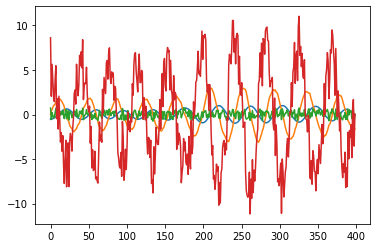

In [3]:
# columns are: angle angular_velocity input_torque angular_acceleration
plt.plot(X);

In [4]:
# Prepare data matrix
X1 = np.c_[np.ones(N), X[:,:-1]] # 1, angle, velocity, torque
Y = X[:,-1]  # acceleration

In [5]:
# Batch solution: W = (X^T X)^(-1) X^T Y
w = np.linalg.inv(X1.T@X1) @ X1.T@Y
#w = np.linalg.solve(X1.T@X1, X1.T@Y)
print("w =", w)

w = [ 7.08849654e-03 -8.91143505e+00 -2.32153575e-01  5.02232076e+00]


[-1.4036194  -8.74091213 -0.27745767  4.69282731]


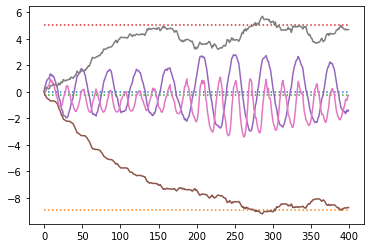

In [6]:
# Online regression
alpha = 0.05  # learning rate
W = np.zeros((N+1,D))  # history of weights
for i in range(N):
    y = W[i]*X1[i]
    W[i+1] = W[i] + alpha*(Y[i] - y)*X1[i]
print( W[-1])
plt.plot([0,N], np.vstack((w,w)), ":")
plt.plot(W);

[ 0.58269674 -9.18349061  0.41219839  5.52579133]


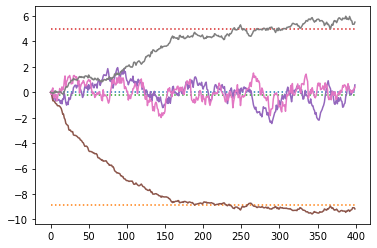

In [7]:
alpha = 0.05  # learning rate
W = np.zeros((N+1,D))  # history of weights
for i in range(N):
    j = np.random.randint(N)  # random sample from the array
    y = W[i]*X1[j]
    W[i+1] = W[i] + alpha*(Y[j] - y)*X1[j]
print( W[-1])
plt.plot([0,N], np.vstack((w,w)), ":")
plt.plot(W);

2) Implement linear regression using Gaussian basis fuctions. 
Test that with the nonlinear pendulum data in 'data/pend2.txt'.

In [20]:
def gbasis1(x, C):
    """1D Gaussian basis functions with centers at C"""
    s = C[1] - C[0]  # basis width
    return np.exp(-((x - C)/s)**2)

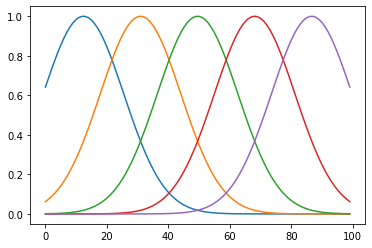

In [21]:
M = 5
N = 100
C = np.linspace(-3, 3, M)
X = np.linspace(-4, 4, N)
F = np.zeros((N, M))
for i, x in enumerate(X):
    F[i] = gbasis1(x, C)
plt.plot(F);

In [22]:
def gbasis2(x, C0, C1):
    """2D Gaussian basis functions with centers C0 and C1"""
    F0 = gbasis1(x[0], C0)
    F1 = gbasis1(x[1], C1)
    return np.outer(F0, F1)

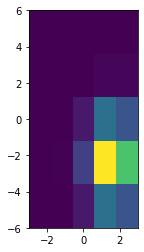

In [25]:
# example of activation
C1 = np.linspace(-6, 6, M)
x = [2,-3]
F = gbasis2(x, C, C1)
plt.imshow(F.T, origin='lower', extent=(-3,3,-6,6));

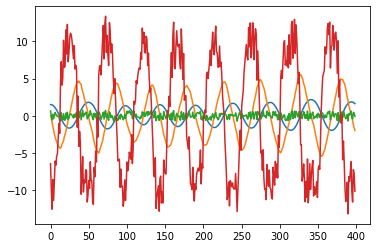

In [26]:
# Read in the data from data/pend2.txt
X = np.loadtxt("data/pend2.txt")
N, D = X.shape
plt.plot(X);

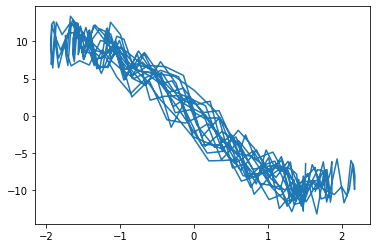

In [27]:
plt.plot(X[:,0], X[:,-1]);

In [29]:
# Prepare data matrix
X2 = X[:,:2] # angle, velocity
Y = X[:,-1]  # acceleration
F = np.zeros((N, M*M))
for i in range(N):
    F[i] = gbasis2(X2[i], C, C1).ravel()  # stretch as a vector
F1 = np.c_[np.ones(N), F] #

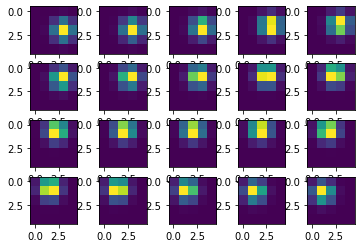

In [30]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(F[i].reshape((M,M)).T)

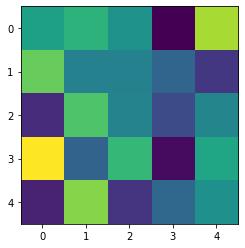

In [17]:
# batch solution
# Batch solution: W = (X^T X)^(-1) X^T Y
#w = np.linalg.inv(F.T@F) @ F.T@Y
w = np.linalg.inv(F1.T@F1) @ F1.T@Y
plt.imshow(w[1:].reshape((M,M)).T);

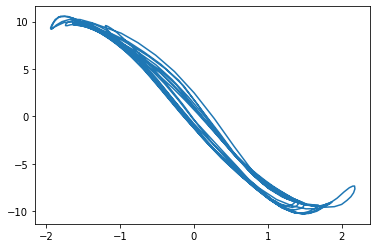

In [18]:
Z = F1@w
plt.plot(X[:,0], Z);

3) Implement a batch version of logistic regression by iterative least squares.